In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import statistics as st

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station

In [9]:
station

sqlalchemy.ext.automap.station

In [10]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [11]:
inspector = inspect(engine)

# Exploratory Precipitation Analysis

In [12]:
#Inspecting measurement database
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
#Inspecting station database
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
# Find the most recent date in the data set.
recent_date=session.query(measurement.date).order_by(measurement.date.desc()).first()

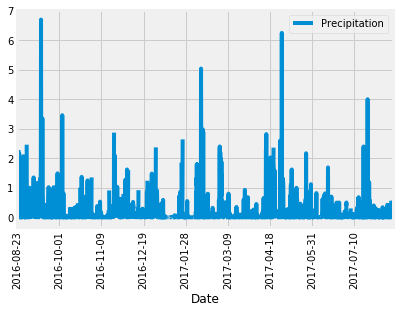

In [15]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
x_date=dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prp_data=session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= x_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
dt_data=[]
prp=[]
for row in prp_data:
    dt_data.append(row.date)
    prp.append(row.prcp)

df=pd.DataFrame(prp_data,columns=['Date','Precipitation'])
df=df.set_index('Date')
# Sort the dataframe by date
df=df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)


In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
n_sttns=session.query(station).count()
print(f"The total number of stations are {n_sttns}")

The total number of stations are 9


In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
x=session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
x

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_data=session.query(measurement.tobs).filter(measurement.station=='USC00519281')

temp=[]
for t in temp_data:
    temp.append(t.tobs)

print(f"Maximum temperature: {max(temp)}")
print(f"Minimum temperature: {min(temp)}")
print(f"Average temperature: {round(st.mean(temp),2)}")


Maximum temperature: 85.0
Minimum temperature: 54.0
Average temperature: 71.66


In [20]:
#Using in query directly
session.query(func.max(measurement.tobs),func.min(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()

[(85.0, 54.0, 71.66378066378067)]

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_date_stn=session.query(measurement.date).order_by(measurement.date.desc()).filter(measurement.station=='USC00519281').first()
last_date_stn

('2017-08-18')

In [43]:
last_date_dict=last_date_stn._asdict()
last_date=last_date_dict['date']

year=int(last_date[0:4])
month=int(last_date[5:7])
day=int(last_date[8:10])


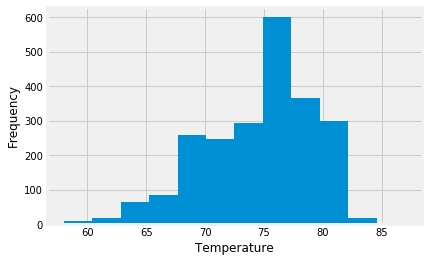

In [44]:
#Last Date for Station: USC00519281 is 2017-08-18

x_date=dt.date(year, month, day) - dt.timedelta(days=365)

t_data=session.query(measurement.tobs).\
    filter(measurement.date >= x_date).all()

temps=[]

for row in t_data:
    temps.append(row.tobs)

plt.hist(temps, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


# Close session

In [22]:
# Close Session
session.close()